In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

price_color = {
    'low': '#ff6602ff',
    'medium': '#0f7175ff',
    'high': '#c65dc9ff'
}

Carga de los datos

In [5]:
train = pd.read_parquet('train.parquet',engine='pyarrow')
test = pd.read_parquet('test.parquet', engine='pyarrow')

In [202]:
train.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va


¿Que tipo de datos son las variables del conjunto de datos?

In [6]:
train.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

Segmentación de la columna precio con las siguientes categorías:
* 'low': Para precios entre 0 y 999 dólares.
* 'medium': Para precios entre 1000 y 1999 dólares.
* 'high': Para precios desde 2000 dólares en adelante.

In [7]:
def segmentation(x):
    if x>=0 and x <=999:
        category = 'low'
    if x>=1000 and x <=1999:
        category = 'medium'
    if x>=2000:
        category = 'high'
    return category

In [8]:
# Se aplica la función segentación a la columna price
train['category_price']=train.price.apply(lambda x : segmentation(x))

In [62]:
train.head(1)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id,medium


In [9]:
# Se elimina la columna price del dataset
train = train.drop('price',axis=1)

In [64]:
train.shape

(346479, 22)

¿Existen valores nulos explícitos en el conjunto de datos?

In [65]:
train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
category_price                  0
dtype: int64

Las columnas laundry_options, parking_options, lat, long presentan valores nulos

In [8]:
#datos repetidos
train.duplicated().sum()

0

¿Qué estadísticos describen el conjunto de datos?

In [67]:
#Solo las variables numéricas
train.describe(include=[np.number])

,id,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


Se observa que la columna sqfeet y beds una std grande lo que indica que pueden existir outliers

In [68]:
# Solo variables categóricas
train.describe(include=object)

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state,category_price
count,346479,346479,346479,346479,275308,219797,346479,346477,346479,346479
unique,346479,404,413,12,5,7,168246,254990,51,3
top,https://boise.craigslist.org/apa/d/very-nice-b...,jacksonville,https://omaha.craigslist.org,apartment,w/d in unit,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,***Special Move in Today!! $199 With Deposit**...,ca,low
freq,1,3849,2465,286303,118627,115612,363,467,29791,160654


De los datos obtenidos se puede observar las propiedades con mayor frecuencia de precio son las categorizadas en low, la región mas ferecuente es jacksonville y el tipo de propiedad es apartment

Análisis univariado

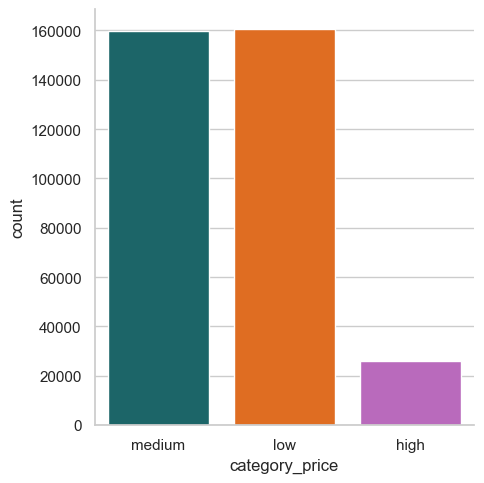

In [69]:
# Número de conteos de las categorías de precios
sns.catplot(data=train,x='category_price',kind='count',palette=price_color)

In [70]:
train.category_price.value_counts()

low       160654
medium    159804
high       26021
Name: category_price, dtype: int64

La categoria con mayor número de conteos es la LOW

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   type                     346479 non-null  object 
 5   sqfeet                   346479 non-null  int64  
 6   beds                     346479 non-null  int64  
 7   baths                    346479 non-null  float64
 8   cats_allowed             346479 non-null  int64  
 9   dogs_allowed             346479 non-null  int64  
 10  smoking_allowed          346479 non-null  int64  
 11  wheelchair_access        346479 non-null  int64  
 12  electric_vehicle_charge  346479 non-null  int64  
 13  comes_furnished          346479 non-null  int64  
 14  laun

Conversión de variables categóricas en numéricas de la columna category_price segun requerimiento:
* Valores de 0 para toda propiedad que no es 'low' y 1 para las propiedades que son 'low'

In [11]:
train['category_price'] = train['category_price'].map({'low':1,'medium':0,'high':0})

Tratamiento de las variables tipo object del dataset
* Imputación de los valores nulos de las variables categóricas del dataset por la moda
* Conversión de las variables tipo object a categóricas. Esto va permite que se puedan convertir a número pero que sean visibles las categórias
* Obtener los codigos 
* En el caso de que la variable no sea tipo object imputamos los valores nulos con la mediana

In [12]:
data = train.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

Número de conteos de la variable predictora

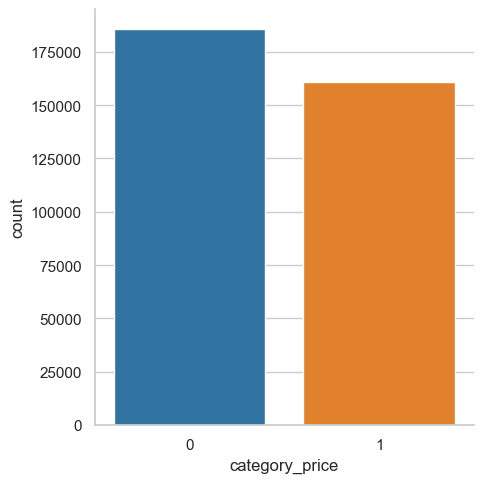

In [13]:
sns.catplot(data=data,x='category_price',kind='count')

In [129]:
data.category_price.value_counts()

0    170923
1    154604
Name: category_price, dtype: int64

In [75]:
# Se explora si hay nulos en el dataset data
data.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
category_price             0
dtype: int64

In [76]:
data.head(3)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,38528,33,38,6,1200,2,2.0,1,1,...,0,0,4,2,27836,180263,43.5851,-116.2250,13,0
1,7043931179,76487,64,79,0,694,1,1.0,1,1,...,0,0,4,1,65486,245096,38.9137,-104.7800,5,0
2,7048254516,217648,236,251,0,900,2,2.0,0,0,...,0,0,3,4,99029,59958,36.7922,-76.1643,45,0


In [78]:
# Valor máximo de las variables originales
train.max(numeric_only=True)

id                         7.051292e+09
sqfeet                     8.388607e+06
beds                       1.100000e+03
baths                      7.500000e+01
cats_allowed               1.000000e+00
dogs_allowed               1.000000e+00
smoking_allowed            1.000000e+00
wheelchair_access          1.000000e+00
electric_vehicle_charge    1.000000e+00
comes_furnished            1.000000e+00
lat                        1.020360e+02
long                       1.726330e+02
category_price             1.000000e+00
dtype: float64

Posibles outliers en sqfeet, beds y baths

In [144]:
# Valores mínimos de las variables
train.min(numeric_only=True)

id                         7.003808e+09
sqfeet                     0.000000e+00
beds                       0.000000e+00
baths                      0.000000e+00
cats_allowed               0.000000e+00
dogs_allowed               0.000000e+00
smoking_allowed            0.000000e+00
wheelchair_access          0.000000e+00
electric_vehicle_charge    0.000000e+00
comes_furnished            0.000000e+00
lat                       -4.353330e+01
long                      -1.638940e+02
category_price             0.000000e+00
dtype: float64

### Detección de outliers

* Variable baths

<AxesSubplot: >

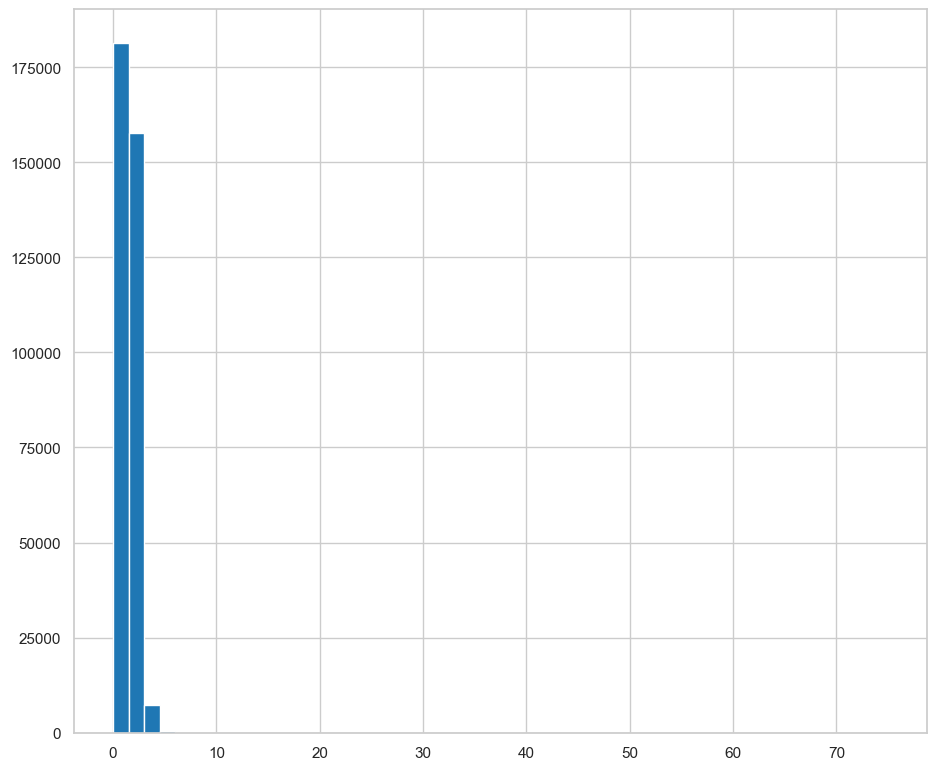

In [80]:
#plt.xlim(0, 10)
data.baths.hist(bins=50)

<AxesSubplot: xlabel='baths'>

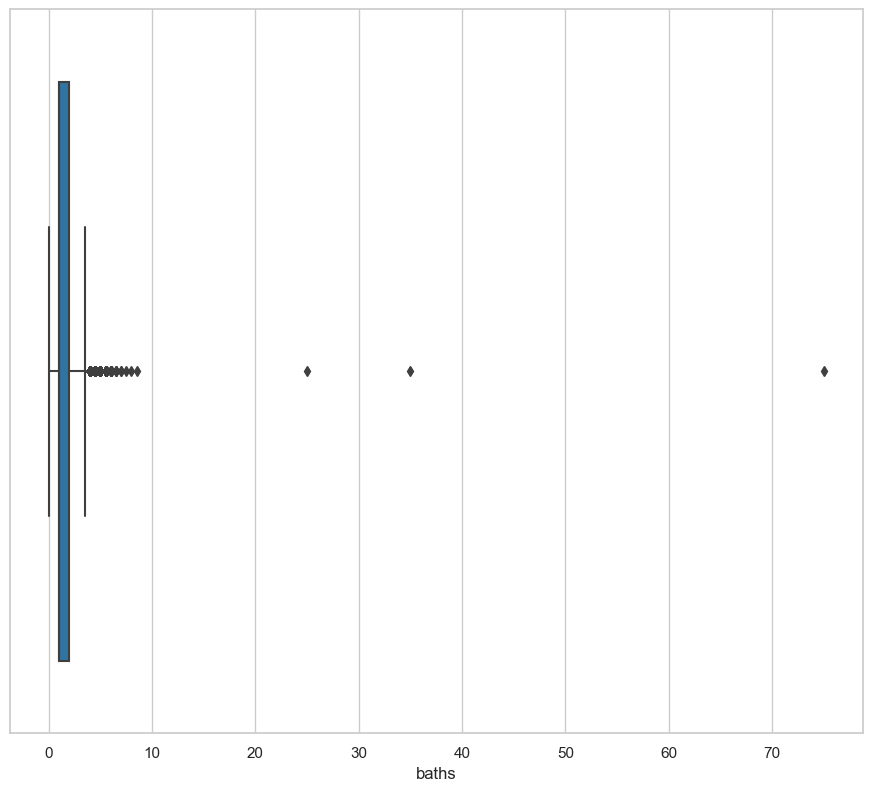

In [81]:
# Diagrama de caja 
sns.boxplot(data=train,x='baths')

In [21]:
# Estadísticos para el boxplot
Q1 = data.baths.quantile(0.25)
Q2 = data.baths.median()
Q3 = data.baths.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = data.baths.min()
valor_maximo = data.baths.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(1.0, 1.0, 2.0, 1.0, 0.0, 75.0)

In [22]:
#Valores de los bigotes inferiores y superiores
B1 = Q1 - 1.5*IRQ
B2 = Q3 + 1.5*IRQ
(B1,B2)

(-0.5, 3.5)

In [23]:
#Número de outliers variable baths
outlier_baths = data['baths']> 3.5
outlier_baths.sum()

1768

* Variable sqfeet

<AxesSubplot: >

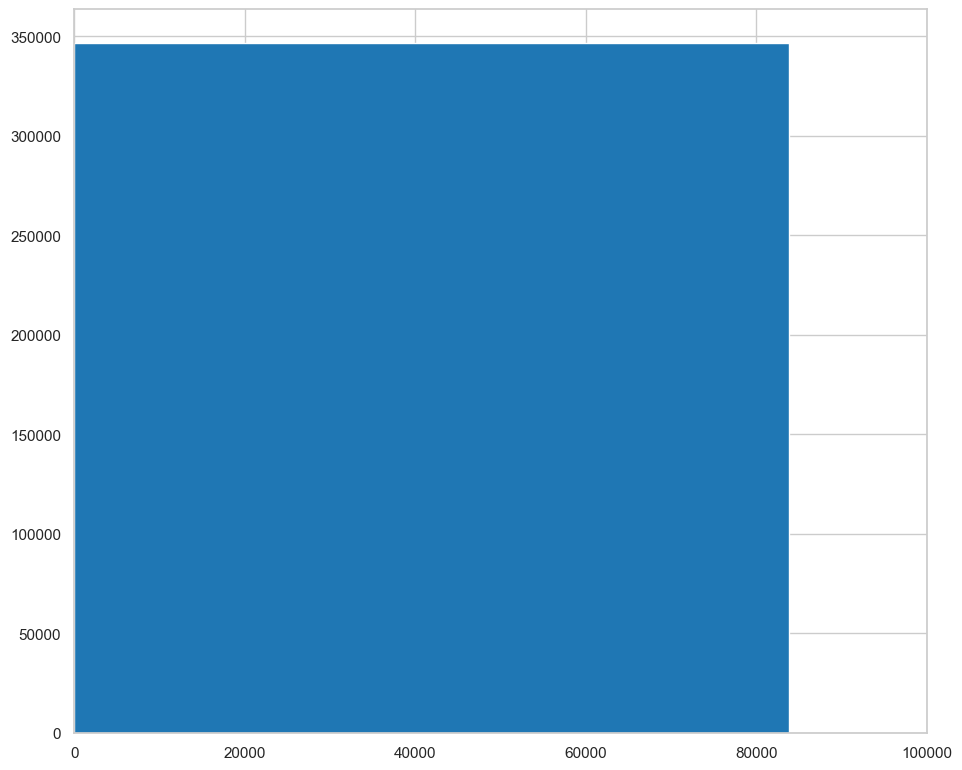

In [87]:
plt.xlim(0, 100000)
train.sqfeet.hist(bins=100)

Los datos de la variable sqfeet presentan una distribución uniforme

<AxesSubplot: xlabel='sqfeet'>

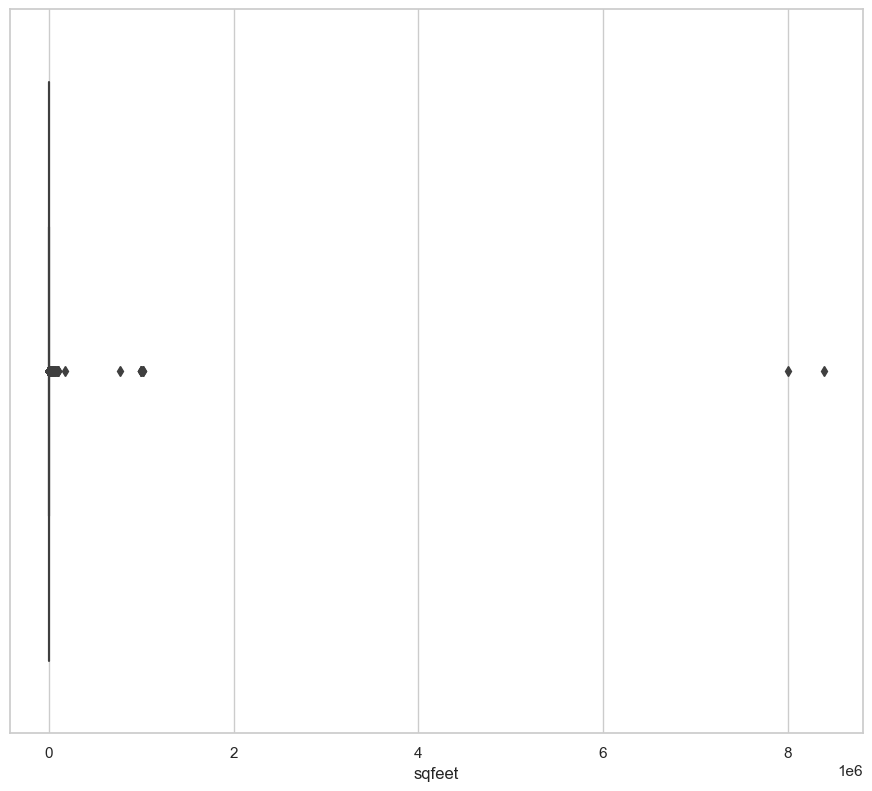

In [88]:
sns.boxplot(data=data,x='sqfeet')

In [24]:
# Calculamos los estadísticos para el boxplot
Q1 = data.sqfeet.quantile(0.25)
Q2 = data.sqfeet.median()
Q3 = data.sqfeet.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = data.sqfeet.min()
valor_maximo = data.sqfeet.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(750.0, 949.0, 1150.0, 400.0, 0, 8388607)

In [25]:
#Valores de los bigotes inferiores y superiores
B1 = Q1 - 1.5*IRQ
B2 = Q3 + 1.5*IRQ
(B1,B2)

(150.0, 1750.0)

In [92]:
outlier_sqfeet1 = data['sqfeet']> 1750 
outlier_sqfeet2 = data['sqfeet']< 150 
outlier_sqfeet1.sum() + outlier_sqfeet2.sum()

14504

* Variable beds

<AxesSubplot: >

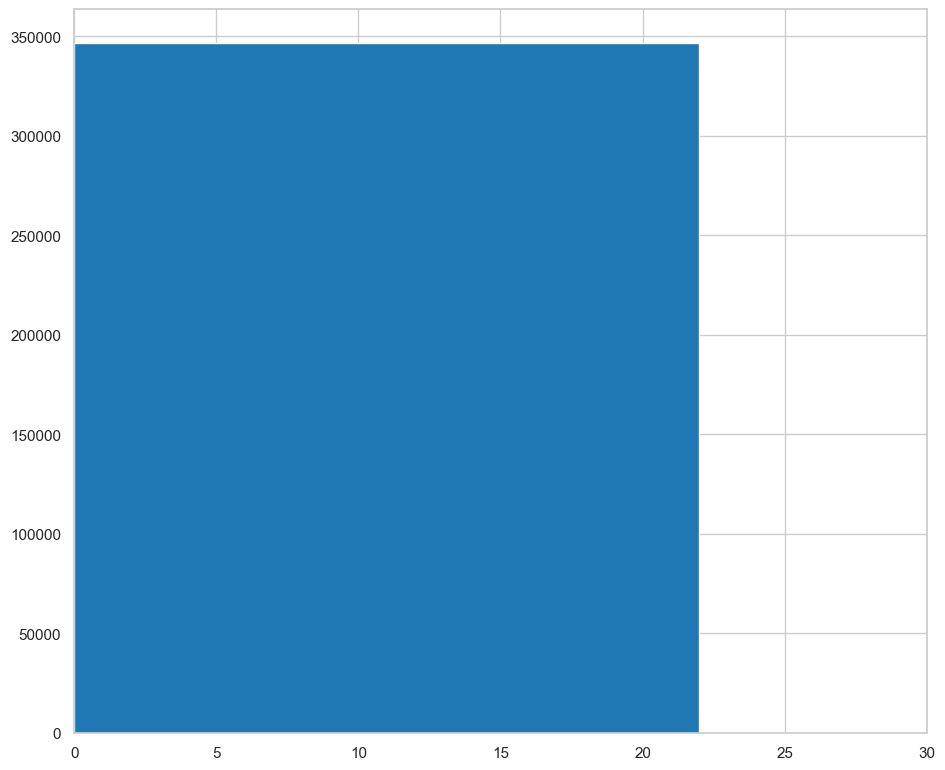

In [93]:
plt.xlim(0, 30)
train.beds.hist(bins=50)

<AxesSubplot: xlabel='beds'>

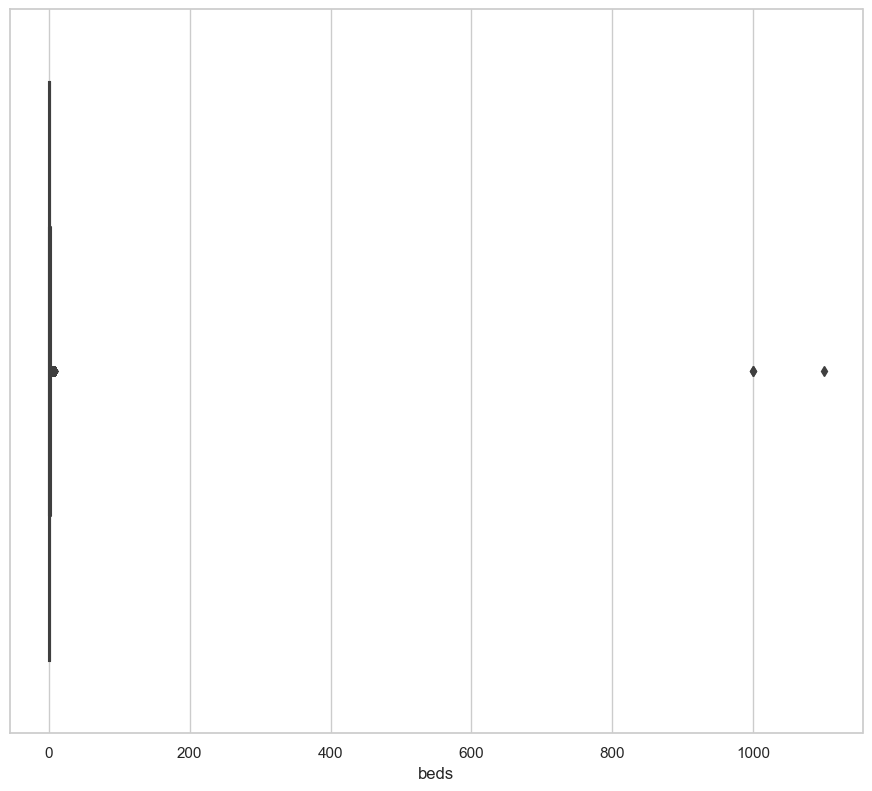

In [94]:
sns.boxplot(data=data,x='beds')

In [95]:
# Calculamos los estadísticos para el boxplot
Q1 = data.beds.quantile(0.25)
Q2 = data.beds.median()
Q3 = data.beds.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = data.beds.min()
valor_maximo = data.beds.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(1.0, 2.0, 2.0, 1.0, 0, 1100)

In [96]:
#Valores de los bigotes inferiores y superiores
B1 = Q1 - 1.5*IRQ
B2 = Q3 + 1.5*IRQ
(B1,B2)

(-0.5, 3.5)

In [97]:
outlier_beds = train['beds']>3.5
outlier_beds.sum()

12792

Gráfico de dispersión de la variable sqfeet respecto a la variable category_price

<AxesSubplot: xlabel='category_price', ylabel='sqfeet'>

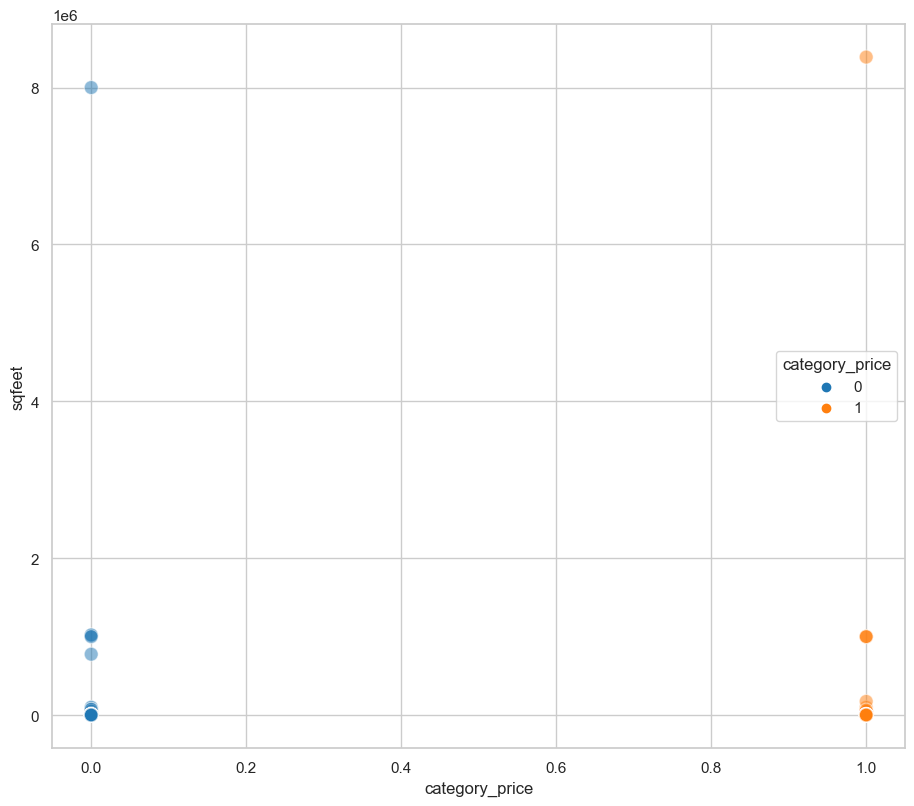

In [98]:
sns.scatterplot(
    data=train,
    x='category_price',
    y='sqfeet',
    alpha=0.5,
    hue='category_price',
    s=100
)

Se elimina la columna id que no aporta información para la clasificación

In [26]:
data = data.drop('id',axis=1)

Se eliminan los outliers del dataset

In [27]:
data = data[data['baths']<=3.5]
data = data[data['sqfeet']<=1750]
data = data[data['sqfeet']>=150]
data = data[data['beds']<=3.5]

<AxesSubplot: xlabel='baths'>

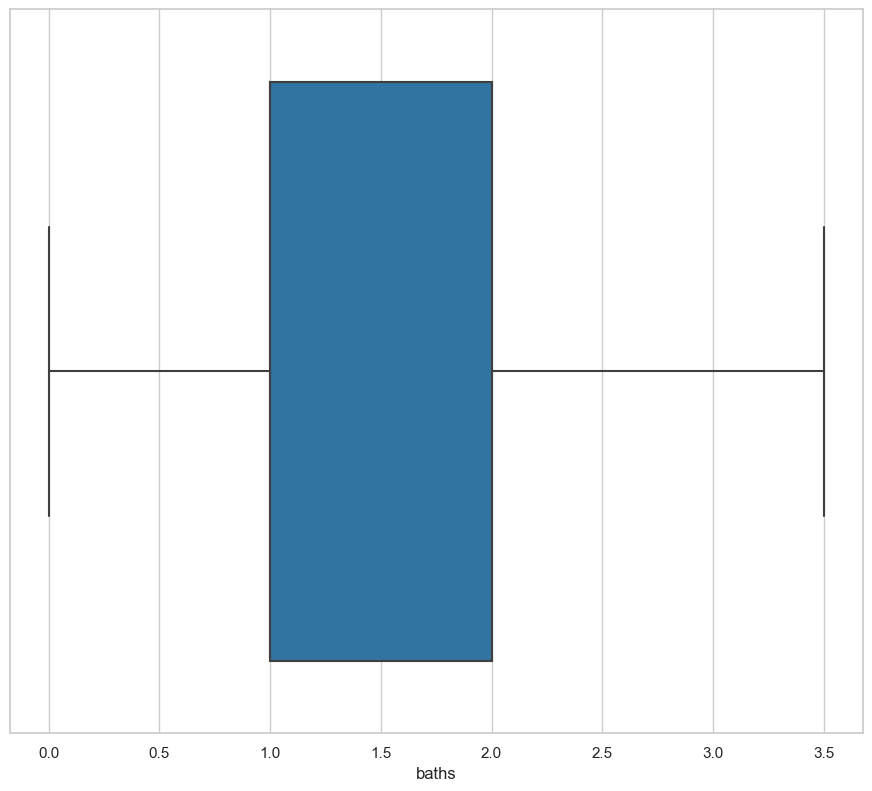

In [101]:
sns.boxplot(data=data,x='baths')

<AxesSubplot: xlabel='sqfeet'>

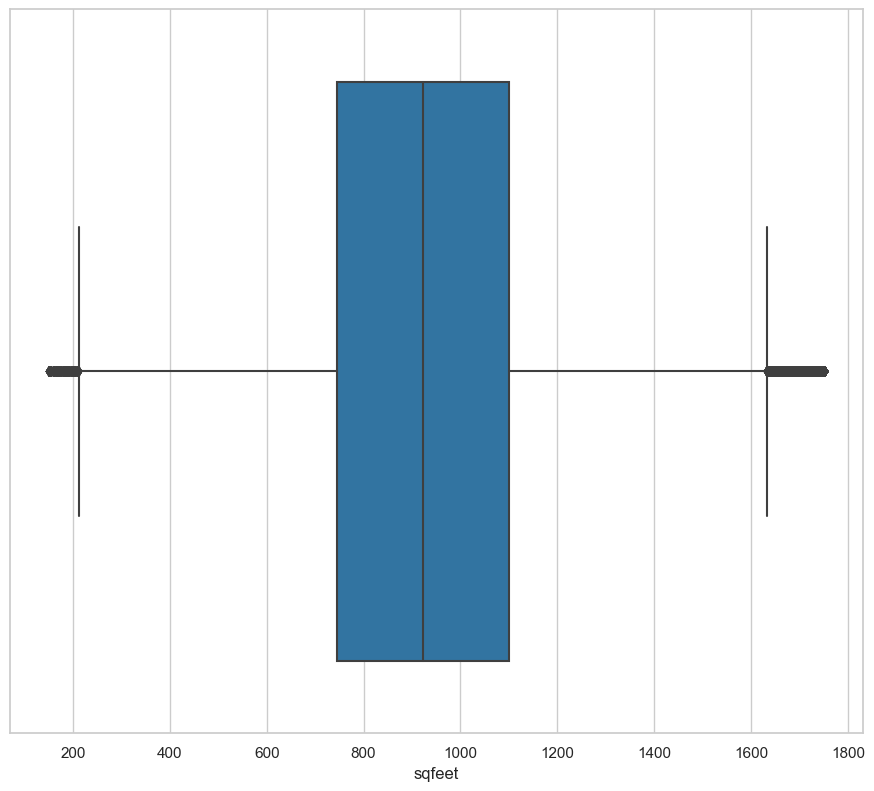

In [102]:
sns.boxplot(data=data,x='sqfeet')

<AxesSubplot: xlabel='beds'>

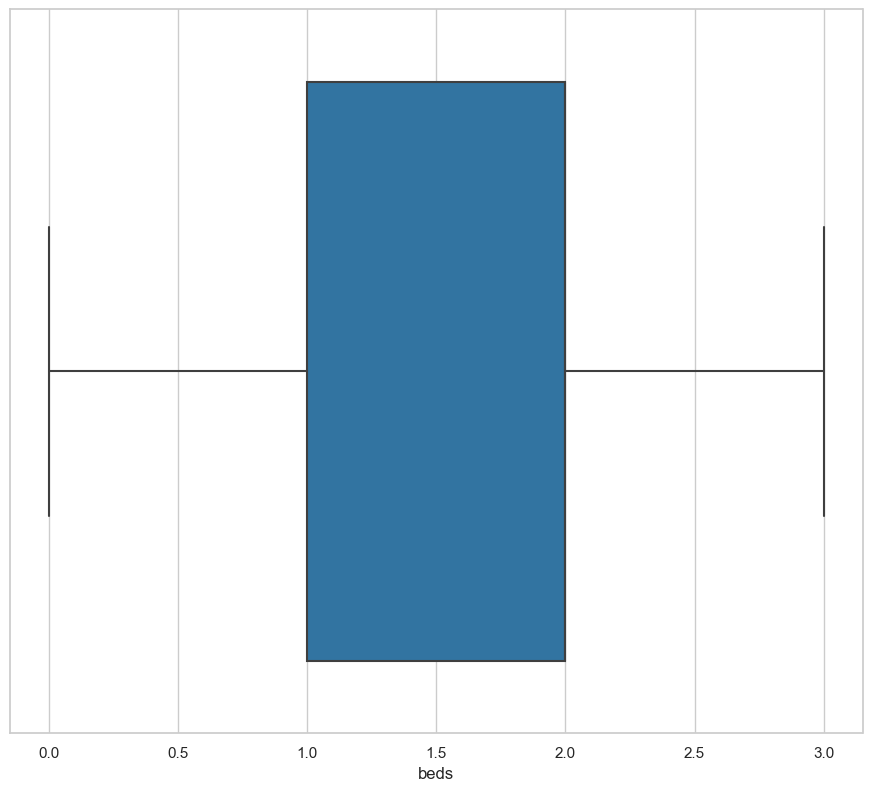

In [103]:
sns.boxplot(data=data,x='beds')

### Análisis bivariado

Mapa de calor de la correlación entre variables

<AxesSubplot: >

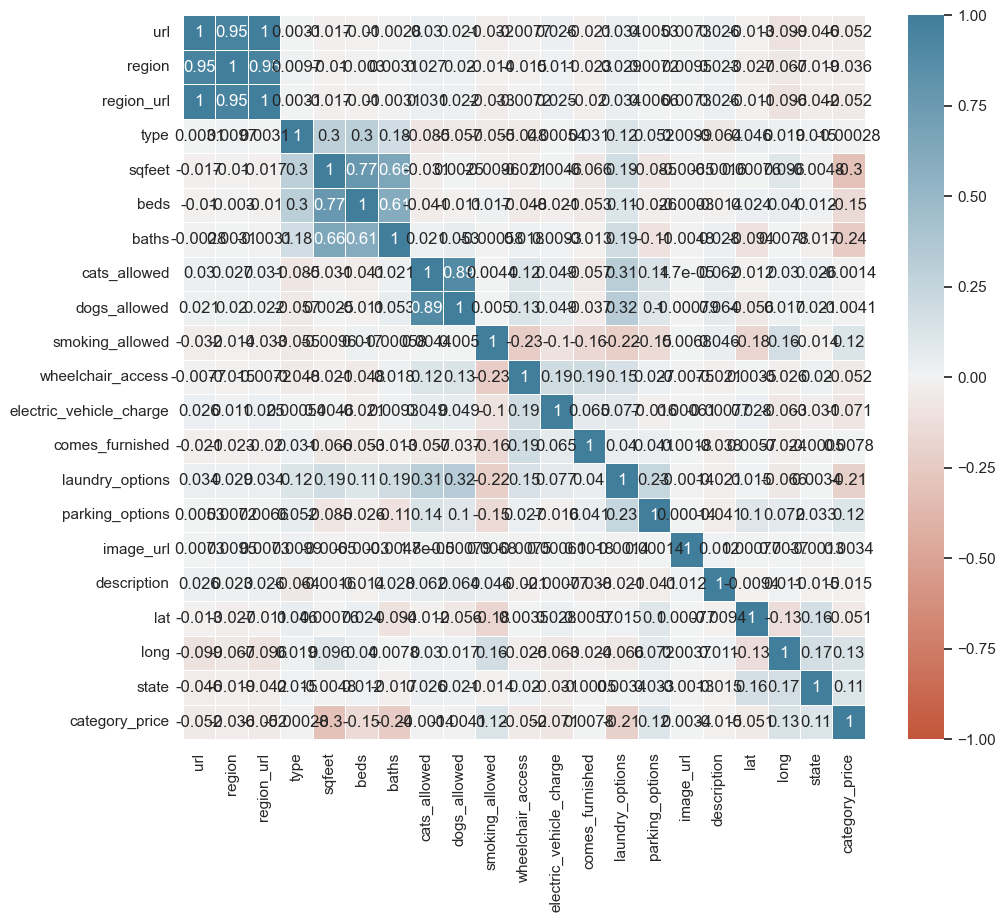

In [104]:
sns.heatmap(
    data=data.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
    )

Se tiene que hay una fuerte correlación entre los conjunto de variables url,region y región_url, cats_allowed y dogs_alloweds y sqfeet,beds y baths 

Selección de variables para el entrenamiento

In [28]:
data = data[['region','type','sqfeet','beds','cats_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options','parking_options','state','category_price']]

Se salva el dataset limpio

In [49]:
data.to_csv('train_ml.csv')

### Modelamiento

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pickle

In [30]:
X = data.drop(['category_price'],axis=1)
y = data['category_price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [32]:
X_train.shape, X_test.shape

((227868, 12), (97659, 12))

1. Pipeline para el modelo 1 GradientBoostingClassifier

In [34]:
pipe_gb = Pipeline([
    ('pca', PCA(n_components=6)),
    ('scl', StandardScaler()),
    ('core_model', GradientBoostingClassifier())
])

In [35]:
results = cross_validate(pipe_gb ,X_train,y_train,return_train_score=True,cv=5)
results

{'fit_time': array([97.25803781, 98.13189769, 95.26534033, 94.95208549, 94.63682318]),
 'score_time': array([0.14238572, 0.13653898, 0.13490438, 0.13788033, 0.14754725]),
 'test_score': array([0.80745601, 0.80622723, 0.80276035, 0.80516973, 0.80385316]),
 'train_score': array([0.80654876, 0.80836451, 0.80762395, 0.80523876, 0.80554047])}

In [36]:
pipe_gb.fit(X_train,y_train)


Pipeline(steps=[('pca', PCA(n_components=6)), ('scl', StandardScaler()),
                ('core_model', GradientBoostingClassifier())])

In [38]:
pipe_gb.score(X_test, y_test)

0.8070633530959768

In [86]:
accuracies = {}
gb_predict = pipe_gb.predict(X_test)
gb_recall = recall_score(gb_predict,y_test)
gb_accuracy = accuracy_score(gb_predict,y_test)
gb_precision = precision_score(gb_predict,y_test)
accuracies['GradientBoostingClassifier'] = gb_accuracy*100
gb_accuracy, gb_precision, gb_recall

(0.8070633530959768, 0.7976882359295668, 0.7957283562145736)

In [39]:
pkl_filename = "model_gb.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_gb, file)

2. Pipeline para el modelo 2 DecisionTreeClassifier 

In [40]:
from sklearn import tree
pipe_dt = Pipeline([
			('scl',StandardScaler()),
			('pca', PCA(n_components=6)),
    		('clf', tree.DecisionTreeClassifier(random_state=42))])

In [41]:
results_dt = cross_validate(pipe_dt ,X_train,y_train,return_train_score=True,cv=5)
results_dt

{'fit_time': array([11.28211713, 12.64838219, 15.0118041 ,  6.64379168, 14.02232862]),
 'score_time': array([0.05005193, 0.04665375, 0.04512024, 0.04368401, 0.0455308 ]),
 'test_score': array([0.89860447, 0.89954799, 0.89741958, 0.89917276, 0.8967371 ]),
 'train_score': array([0.98564407, 0.98601161, 0.98569344, 0.98561672, 0.98584163])}

In [42]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=6)),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [43]:
pipe_dt.score(X_test, y_test)

0.904279175498418

In [91]:
dt_predict = pipe_dt.predict(X_test)
dt_recall = recall_score(dt_predict,y_test)
dt_accuracy = accuracy_score(dt_predict,y_test)
dt_precision = precision_score(dt_predict,y_test)
accuracies['DecisionTreeClassifier'] = dt_accuracy*100
dt_accuracy, dt_precision, dt_recall

(0.904279175498418, 0.8976342227503511, 0.9001234915614099)

In [79]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, dt_predict)
matrix

array([[46764,  4610],
       [ 4738, 41547]], dtype=int64)

In [170]:
y_test.value_counts()

0    51374
1    46285
Name: category_price, dtype: int64

In [47]:
# Save the model
pkl_filename = "model_dt.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_dt, file)

3. Pipeline modelo 3 XGBClassifier

In [48]:
from xgboost import XGBClassifier

In [49]:
pipe_xgb = Pipeline([
			('scl',StandardScaler()),
			('pca', PCA(n_components=6)),
    		('clf', XGBClassifier(n_estimators=150,
                            seed=42, use_label_encoder= False))])

c:\Users\cquinayas\Documents\Curso Henry\proyecto_ML\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [50]:
results_xgb = cross_validate(pipe_xgb ,X_train,y_train,return_train_score=True,cv=5)
results_xgb

c:\Users\cquinayas\Documents\Curso Henry\proyecto_ML\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\cquinayas\Documents\Curso Henry\proyecto_ML\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\cquinayas\Documents\Curso Henry\proyecto_ML\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\cquinayas\Documents\Curso Henry\proyecto_ML\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\cquinayas\Documents\Curso Henry\proyecto_ML\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

{'fit_time': array([21.98755574, 24.26892376, 29.30811763, 27.42455506, 26.09181261]),
 'score_time': array([0.10412264, 0.09218955, 0.08815908, 0.09513354, 0.09214902]),
 'test_score': array([0.84517488, 0.83990872, 0.84230043, 0.84552257, 0.8455884 ]),
 'train_score': array([0.8657992 , 0.86177274, 0.86306735, 0.86304616, 0.86623879])}

In [51]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=6)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [52]:
pipe_xgb.score(X_test, y_test)

0.8453496349542797

In [87]:
xgb_predict = pipe_xgb.predict(X_test)
xgb_recall = recall_score(xgb_predict,y_test)
xgb_accuracy = accuracy_score(xgb_predict,y_test)
xgb_precision = precision_score(xgb_predict,y_test)
accuracies['XGBClassifier'] = xgb_accuracy*100
xgb_accuracy, xgb_precision, xgb_recall

(0.8453496349542797, 0.8342011450793994, 0.8386403127715031)

In [58]:
pkl_filename = "model_xgb.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_xgb, file)

4. Pipeline modelo 4 RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline([
			('scl',StandardScaler()),
			('pca', PCA(n_components=6)),
    		('clf', RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42))])

In [54]:
results_rf = cross_validate(pipe_rf ,X_train,y_train,return_train_score=True,cv=5)
results_rf

{'fit_time': array([32.8114059 , 35.42460942, 25.96833706, 34.4155643 , 32.12015915]),
 'score_time': array([0.34492612, 0.3493104 , 0.33430266, 0.32048512, 0.33641028]),
 'test_score': array([0.91793567, 0.91848422, 0.91767236, 0.91914072, 0.91659535]),
 'train_score': array([0.98562761, 0.98599515, 0.98568247, 0.98561672, 0.98583614])}

In [55]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=6)),
                ('clf',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [56]:
pipe_rf.score(X_test, y_test)

0.92358103195814

In [88]:
rf_predict = pipe_rf.predict(X_test)
rf_recall = recall_score(rf_predict,y_test)
rf_accuracy = accuracy_score(rf_predict,y_test)
rf_precision = precision_score(rf_predict,y_test)
accuracies['RandomForestClassifier'] = rf_accuracy*100
rf_accuracy, rf_precision, rf_recall

(0.92358103195814, 0.9118072809765583, 0.9258292383292384)

In [57]:
import pickle
pkl_filename = "model_rf.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_rf, file)

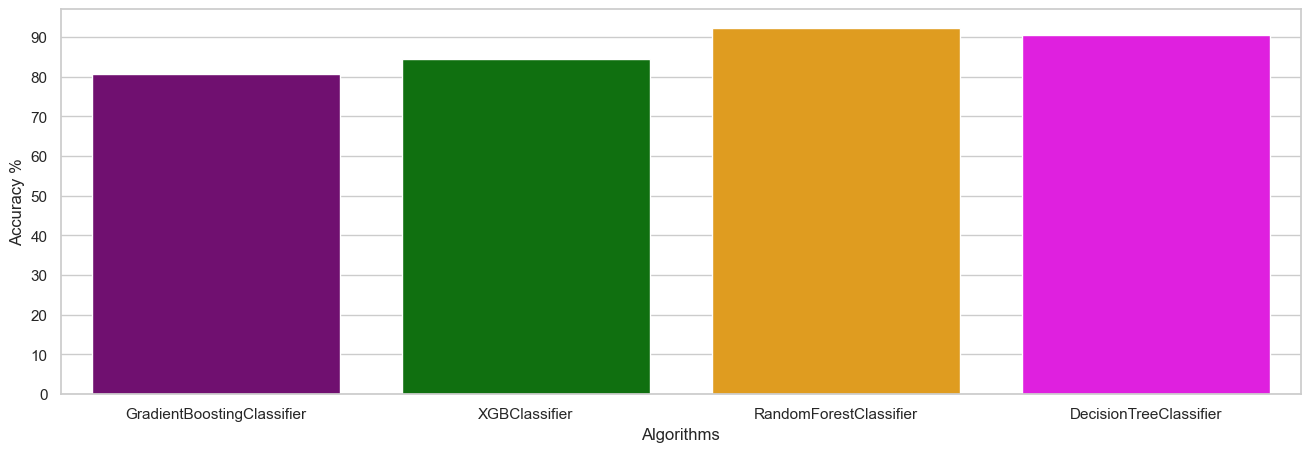

In [92]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Validación del modelo con los datos de test

In [59]:
test.head(3)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi


In [60]:
test.columns

Index(['id', 'url', 'region', 'region_url', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'image_url', 'description', 'lat', 'long', 'state'],
      dtype='object')

In [61]:
data_test = test.copy()
for i, column in enumerate(list([str(d) for d in data_test.dtypes])):
    if column == "object":
        data_test[data_test.columns[i]] = data_test[data_test.columns[i]].fillna(data_test[data_test.columns[i]].mode())
        data_test[data_test.columns[i]] = data_test[data_test.columns[i]].astype("category").cat.codes
    else:
        data_test[data_test.columns[i]] = data_test[data_test.columns[i]].fillna(data_test[data_test.columns[i]].median())

In [150]:
data_test.head(1)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,1478,9,11,8,1344,3,2.0,0,0,...,0,0,0,4,4,9913,18646,42.5333,-83.5763,22


In [62]:
data_test = data_test[['region','type','sqfeet','beds','cats_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options','parking_options','state']]

In [63]:
data_test.shape

(38498, 12)

In [64]:
result_predict = pipe_dt.predict(data_test)

In [65]:
cquinayas = pd.DataFrame(result_predict)

In [66]:
cquinayas

,0
0,0
1,0
2,0
3,0
4,0
...,...
38493,0
38494,1
38495,1
38496,0


In [68]:
cquinayas.to_csv('cquinayas.csv',index=False)